# Numerical exercises

- visualisation of phase portraits

In [1]:
# importing the needed python libraries
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
from scipy.integrate import solve_ivp  # used in numerical integration

# Example 2.8.1 in Strogatz
Solve system $\dot{x} = x(1-x)$ numerically.

Plot the slope field in (t, x) plane.

### Quiver

* Quiver is a function in matplotlib. See the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html).
* The function can be used to plot a field with arrows pointing from (t,x) to (t+u, x+v) at each point of a defined grid. We get arrows with slope dx/dt by setting u=1 and v=dx/dt at each point.

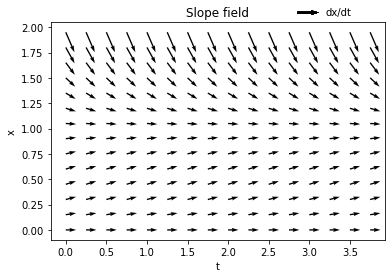

In [2]:
# creating grid points
t, x = np.meshgrid(np.arange(0,4, 0.25), np.arange(0,2, 0.15))

# v=dx/dt and u=1 at each point
V = x*(1-x)
U = np.ones(V.shape)

# setting up the plot and labels
fig, ax = plt.subplots()
ax.set_title('Slope field')
ax.set_xlabel('t')
ax.set_ylabel('x')

# plots arrows pointing from (t,x) to (t+u, x+v) at each point of the grid
q = ax.quiver(t, x, U, V, angles='xy')

# quiverkey function is for labelling the arrows - position (X, Y) and length U 
ax.quiverkey(q, X=0.8, Y=1.045, U=2,
             label='dx/dt', labelpos='E')
plt.show()

### Streamplot

* Streamplot is also a function in matplotlib, see the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html?highlight=streamplot#matplotlib.pyplot.streamplot).

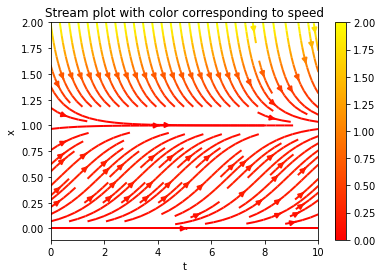

In [3]:
X, T = np.mgrid[0:2:100j, 0:10:100j]
V = X*(1-X)
U = np.ones(V.shape)

fig, ax = plt.subplots()
ax.set_title('Stream plot with color corresponding to speed')
ax.set_xlabel('t')
ax.set_ylabel('x')

# plotting the speed (dx/dt) as the color
# using the absolute value of V because the arrows are already indicating the direction
plt.streamplot(T, X, U, V, color=np.abs(V), linewidth=2, cmap=plt.cm.autumn)
plt.colorbar()

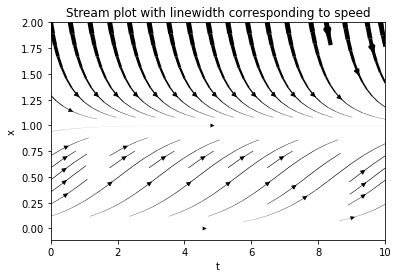

In [4]:
X, T = np.mgrid[0:2:100j, 0:10:100j]
V = X*(1-X)
U = np.ones(V.shape)

fig, ax = plt.subplots()
ax.set_title('Stream plot with linewidth corresponding to speed')
ax.set_xlabel('t')
ax.set_ylabel('x')

speed = np.abs(V)
lw = 5*speed/speed.max()   # scaling to convenient range

# plotting the speed (dx/dt) as the linewidth
plt.streamplot(T, X, U, V, density=0.6, color='k', linewidth=lw)

### Numerical integration and plotting trajectories

* solve_ivp is a function in scipy. Documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=solve_ivp#scipy.integrate.solve_ivp)

In [5]:
# defining a function to simulate the differential equation
def simulate(n_timesteps: int, state0: list=[1.0], h: float=0.01) -> Tuple[np.ndarray, np.ndarray]:

    def diff(t, state):
        x = state 
        return x * (1 - x)

    t = np.arange(0, n_timesteps * h, h)
    
    sol = solve_ivp(diff, 
                    y0=state0,
                    method='RK45',
                    t_span=(0.0, n_timesteps*h),
                    dense_output=True)
    
    return sol.sol(t).T, t

In [6]:
# integration timestep
timestep = 0.1

# creating two trajectories, starting states x0: 0.2 and 13
data, data_t = simulate(100, state0 = [0.2, 1, 13], h = timestep)

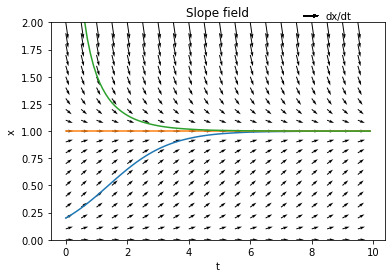

In [7]:
t, x = np.meshgrid(np.arange(0,10, 0.5), np.arange(0,2.1, 0.1))
V = x*(1-x)
U = np.ones(V.shape)

# plotting the slope field
fig, ax = plt.subplots()
q = ax.quiver(t, x, U, V, angles='xy')
ax.quiverkey(q, X=0.8, Y=1.03, U=2,
             label='dx/dt', labelpos='E')

# plotting the simulated trajectories
plt.plot(data_t, data)

ax.set_ylim(0, 2)
ax.set_title('Slope field')
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

Note that if one trajectory dx/dt should diverge, i.e., obtain huge values, say, beyond a value $t = t_d$, then integration will stop at $t = t_d$ for all trajectories. If you want to extend integration beyond $t = t_d$ for other trajectories, you must do the integration for that trajectory separately. Separate integration in the previous example:

In [8]:
# integration timestep
timestep = 0.1

# creating two trajectories, starting states x0: 0.2 and 13
data, data_t = simulate(100, state0 = [0.2], h = timestep)
data2, data_t2 = simulate(100, state0 = [1], h = timestep)
data3, data_t3 = simulate(100, state0 = [13], h = timestep)

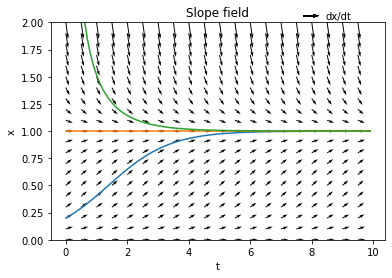

In [9]:
t, x = np.meshgrid(np.arange(0,10, 0.5), np.arange(0,2.1, 0.1))
V = x*(1-x)
U = np.ones(V.shape)

# plotting the slope field
fig, ax = plt.subplots()
q = ax.quiver(t, x, U, V, angles='xy')
ax.quiverkey(q, X=0.8, Y=1.03, U=2,
             label='dx/dt', labelpos='E')

# plotting the simulated trajectories
plt.plot(data_t, data)
plt.plot(data_t2, data2)
plt.plot(data_t3, data3)

ax.set_ylim(0, 2)
ax.set_title('Slope field')
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

## Note that three intial values $x(t=0)$ were needed to plot all the qualitatively different $x(t)$: $x(0) < x^*$, $x(0) = x^*$, and $x(0) > x^*$, where $x^*$ is the fixed point value.

## More plotting examples
See examples in the documentation [here](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py) and [here](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/quiver_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-demo-py) for quiver and [here](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html) for streamplot. 